In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys

#sys.path.append("..\lflPython\fitTools")
from fitTools.Resonator import Resonator

(201,)
(201, 51)
(201, 51)


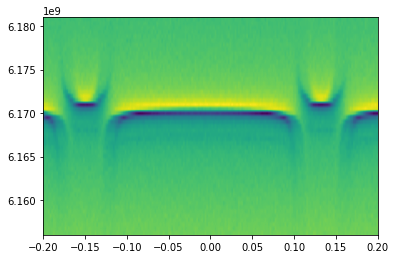

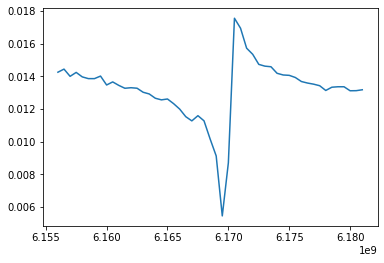

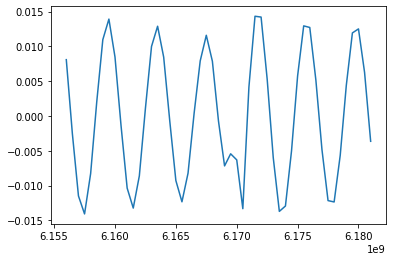

In [81]:
datapath = 'G:\\Shared drives\\Labber\\Data\\PhotonVac\\DISS01\\202209\\fluxSweep\\' 
f_name = 'rr_spec_flux_tune_dissipator_21_1432.h5'
f = h5py.File(datapath + f_name, 'r')

freqs = f['metadata'].attrs["frequencies (Hz)"] #/10**9 #51
keys = [k for k in list(f.keys()) if '=' in k ]
fluxes = set([float(s.split('=')[1]) for s in keys])
fluxes = list(fluxes)
fluxes.sort()
fluxes = [i * 1e3 for i in fluxes] #201
print(np.shape(fluxes))
keys_I = [k for k in list(f.keys()) if '=' in k and 'I with' in k]
keys_I.sort(key=lambda k:float(k.split('=')[1]))

keys_Q = [k for k in list(f.keys()) if '=' in k and 'Q with' in k]
keys_Q.sort(key=lambda k:float(k.split('=')[1]))

data = np.zeros((len(fluxes), len(freqs)), dtype=float)
s21_real = np.zeros((len(fluxes), len(freqs)), dtype=float)
s21_imag = np.zeros((len(fluxes), len(freqs)), dtype=float)

for e,(i,q) in enumerate(list(zip(keys_I, keys_Q))):
    if i[1:] != q[1:]:
        raise ValueError(f'{i} != {q}')
    I = np.array(f[i])
    Q = np.array(f[q])
    data[e,:] = np.sqrt(I**2 + Q**2)
    s21_real[e,:] = I #np.sqrt(I**2 + Q**2)
    s21_imag[e,:] = Q #np.arctan(Q/I)
    
#s21_imag = np.unwrap(s21_imag)
s21_complex = np.zeros((len(fluxes),len(freqs)),dtype=float)
s21_complex = s21_real + 1j*s21_imag
print(np.shape(s21_complex))
plt.imshow(abs(s21_complex.transpose()), aspect='auto',origin='lower',extent=(fluxes[0], fluxes[-1], freqs[0], freqs[-1]))
print(np.shape(s21_complex[:,:]))

plt.figure()
plt.plot(freqs,abs(s21_complex[0,:]))
plt.show()
plt.figure()
plt.plot(freqs,np.unwrap(s21_imag[0,:]))
plt.show()

In [128]:
s21_resfit = np.zeros(len(fluxes))

print(np.shape(freqs))

for i in range(len(fluxes)):
    print(i)
    res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[i,:]);
    res.autofit()#fcrop=(6.150,6.178));
    s21_resfit[i] = res.f0;



(51,)
0
1
2
3
4
5
6
7
8
9
10
fit error = [2.69520033e-05 1.29052400e-01 3.54183188e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
11
12
13
fit error = [7.58279699e-05 3.54224162e-01 3.90724702e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
14
fit error = [6.91452649e-05 3.43646931e-01 3.70786440e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
15
16
17
fit error = [2.71195846e-05 1.20202099e-01 3.35762389e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
18
19
20
21
22
23
24
25
fit error = [4.67584285e-04 2.79852258e+00 9.65762526e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
26
fit error = [7.34423927e-04 2.71155980e+00 2.92653703e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
27
28
29
30
31
32
33
34
35
36

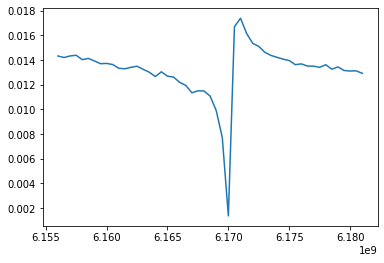

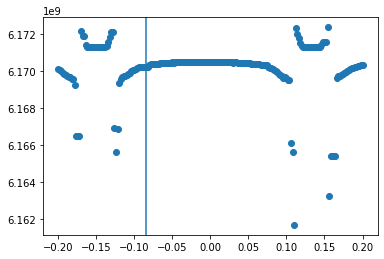

0
0


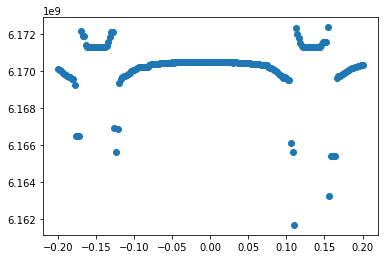

In [130]:
## check res fits that failed
test=58
plt.plot(freqs,abs(s21_complex[test,:]))
res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[test,:])
#res.autofit(fcrop=(6.150,6.178))
#res.show()
#print(res)
plt.show()
#print(s21_resfit)
plt.scatter(fluxes,s21_resfit)
plt.axvline(x=fluxes[test])
plt.show()

s21_full = s21_resfit
print(np.count_nonzero(np.isnan(s21_full)))
for i in range(len(s21_full)):
    if np.isnan(s21_full[i]):
        s21_full[i] = s21_full[i-1]
print(np.count_nonzero(np.isnan(s21_full)))
plt.scatter(fluxes,s21_full)
plt.show()


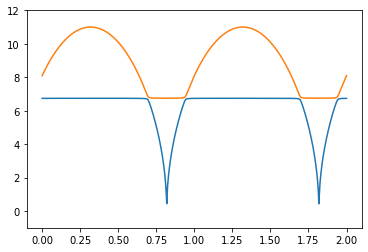

In [132]:
## define fitting functions

#1/2 flux quantum is about 36-14=22 current steps * 10uA/step = 220 uA
from scipy.optimize import curve_fit
import math

def avoided_crossing_lower(x, wq_max, wc, g,phi_offset):
    wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset):
    wq = wq_max*np.emath.sqrt(abs(np.cos(np.pi*x-phi_offset)))
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )

x = np.linspace(0,2,1000)
plt.plot(x,avoided_crossing_lower(x,11,6.745,.1,1))
plt.plot(x,avoided_crossing_upper(x,11,6.745,.1,1))
plt.ylim([-1,12])
plt.show()

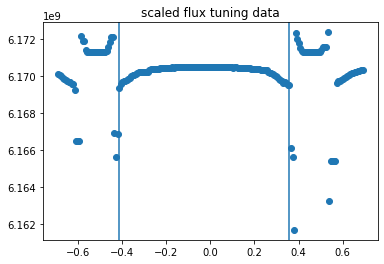

<class 'numpy.float64'>


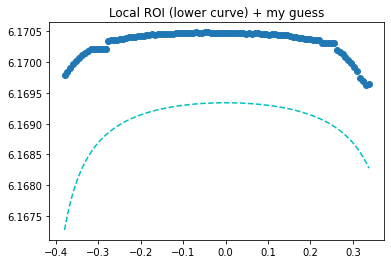

[13.03962039  6.17078762  0.05650602 -0.08769404]


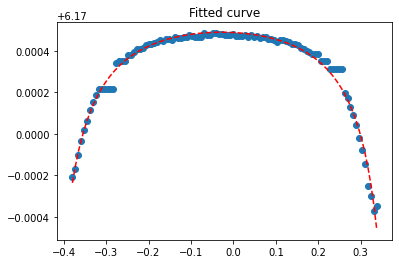

In [171]:
## Fit to lower curve

#Rescale to 1 flux quantum
norm_currents = np.array(fluxes)/.29
plt.scatter(norm_currents,s21_full)
plt.title("scaled flux tuning data")
plt.axvline(x=norm_currents[40])
plt.axvline(x=norm_currents[152])
plt.show()

start=45
stop=150
fit_x = norm_currents[start:stop]
fit_y = abs(s21_full[start:stop])/10**9
print(type(fit_y[1]))
plt.scatter(fit_x,fit_y)
plt.title("Local ROI (lower curve) + my guess")
plt.plot(fit_x,avoided_crossing_lower(fit_x,15,6.17,.1,0),'c--')
plt.show()

popt, pcov = curve_fit(avoided_crossing_lower,fit_x,fit_y,p0=[11,6.17,.01,0])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)

plt.scatter(fit_x,fit_y)
plt.plot(fit_x,avoided_crossing_lower(fit_x,*popt),'r--')
plt.title('Fitted curve')
plt.show()

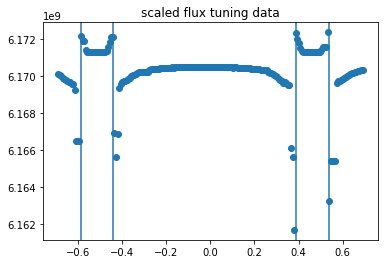

<class 'numpy.float64'>


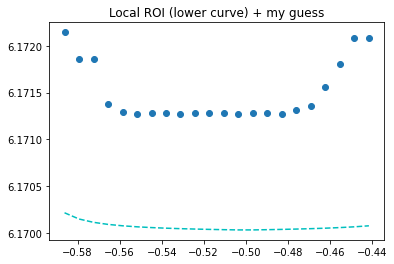

[11.40249274  6.17088614  0.0302605  -0.04522342]


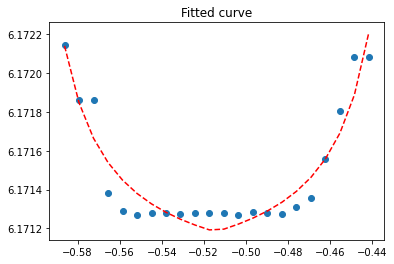

In [180]:
## Fit to upper curve

#Rescale to 1 flux quantum
norm_currents = np.array(fluxes)/.29
plt.scatter(norm_currents,s21_full)
plt.title("scaled flux tuning data")
plt.axvline(x=norm_currents[15])
plt.axvline(x=norm_currents[36])
plt.axvline(x=norm_currents[156])
plt.axvline(x=norm_currents[178])
plt.show()

start=15
stop=37
fit_x = norm_currents[start:stop]
fit_y = abs(s21_full[start:stop])/10**9
print(type(fit_y[1]))
plt.scatter(fit_x,fit_y)
plt.title("Local ROI (lower curve) + my guess")
plt.plot(fit_x,avoided_crossing_upper(fit_x,11,6.17,.01,0),'c--')
plt.show()

popt, pcov = curve_fit(avoided_crossing_upper,fit_x,fit_y,p0=[17,6.17,.09,0])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)

plt.scatter(fit_x,fit_y)
plt.plot(fit_x,avoided_crossing_upper(fit_x,*popt),'r--')
plt.title('Fitted curve')
plt.show()

<class 'numpy.float64'>


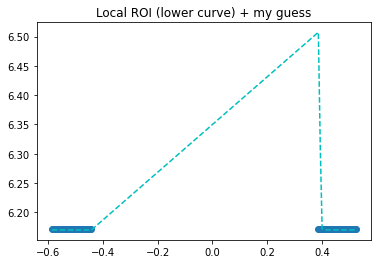

[10.43878615  6.17092998 -0.03048895 -0.08186824]


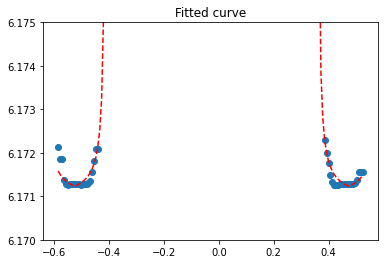

In [223]:
start1=15
stop1=37
start2=156
stop2=177
fit_x = np.concatenate((norm_currents[start1:stop1],norm_currents[start2:stop2]))
fit_y = abs(np.concatenate((s21_full[start1:stop1],s21_full[start2:stop2])))/10**9
print(type(fit_y[1]))
plt.scatter(fit_x,fit_y)
plt.title("Local ROI (lower curve) + my guess")
plt.plot(fit_x,avoided_crossing_upper(fit_x,11,6.17,.01,0),'c--')
plt.show()

popt, pcov = curve_fit(avoided_crossing_upper,fit_x,fit_y,p0=[50,6.17,.1,0])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)

plt.scatter(fit_x,fit_y)
plt.plot(norm_currents[start1:stop2],avoided_crossing_upper(norm_currents[start1:stop2],*popt),'r--')
plt.title('Fitted curve')
plt.ylim([6.17,6.175])
plt.show()

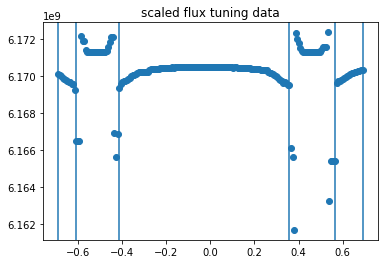

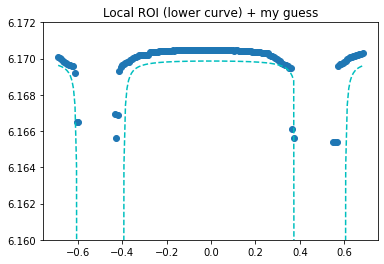

[14.79636608  6.17097844  0.07828349 -0.06605109]


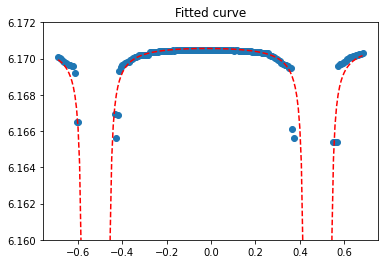

In [215]:
## Fit to lower curve

plt.scatter(norm_currents,s21_full)
plt.title("scaled flux tuning data")
plt.axvline(x=norm_currents[0])
plt.axvline(x=norm_currents[12])
plt.axvline(x=norm_currents[40])
plt.axvline(x=norm_currents[152])
plt.axvline(x=norm_currents[182])
plt.axvline(x=norm_currents[200])
plt.show()

start1=0
stop1=11+3
start2=40-3
stop2=152+3
start3=183-3
stop3=200
fit_x = np.concatenate((norm_currents[start1:stop1],norm_currents[start2:stop2],norm_currents[start3:stop3]))
fit_y = abs(np.concatenate((s21_full[start1:stop1],s21_full[start2:stop2],s21_full[start3:stop3])))/10**9
#print(type(fit_y[1]))
plt.scatter(fit_x,fit_y)
plt.title("Local ROI (lower curve) + my guess")
plt.plot(fit_x,avoided_crossing_lower(fit_x,11,6.17,.03,0),'c--')
plt.ylim([6.16,6.172])
plt.show()

popt, pcov = curve_fit(avoided_crossing_lower,fit_x,fit_y,p0=[11,6.17,.01,0])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)

plt.scatter(fit_x,fit_y)
plt.plot(norm_currents[start1:stop3],avoided_crossing_lower(norm_currents[start1:stop3],*popt),'r--')
plt.title('Fitted curve')
plt.ylim([6.16,6.172])
plt.show()